In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime # 날짜 가공 위함

In [4]:
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
df = pd.read_csv("../input/sales-forecasting/train.csv")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
# date 컬럼 날짜형식 변환
df['Date2'] = pd.to_datetime(df['Order Date'], format='mixed')

# 날자 오름차순 정렬
df = df.sort_values(by='Date2')

# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

In [15]:
df[['Date2', 'Year']]

,Date2,Year
540,2015-01-02,2015
7947,2015-01-03,2015
8309,2015-01-03,2015
8310,2015-01-03,2015
7948,2015-01-03,2015
...,...,...
906,2018-12-30,2018
5091,2018-12-30,2018
1296,2018-12-30,2018
908,2018-12-30,2018


In [16]:
## 선 그래프 용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018]

# 2018년 일 별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


<Axes: xlabel='Date2'>

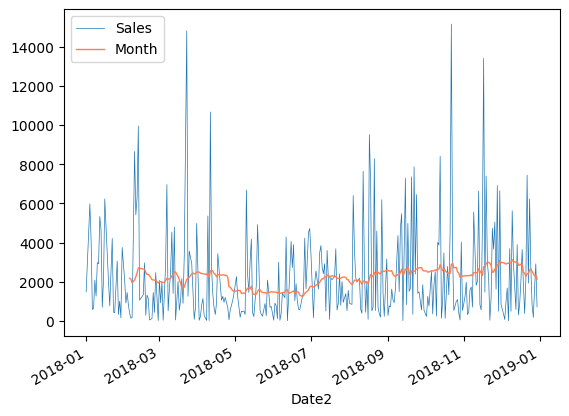

In [18]:
# 30일 이동평균선 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()
# 선 그래프 시각화
ax = df_line.plot(x='Date2', y='Sales', linewidth = '0.5')
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth="1", ax=ax)

In [19]:
# 연도 별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


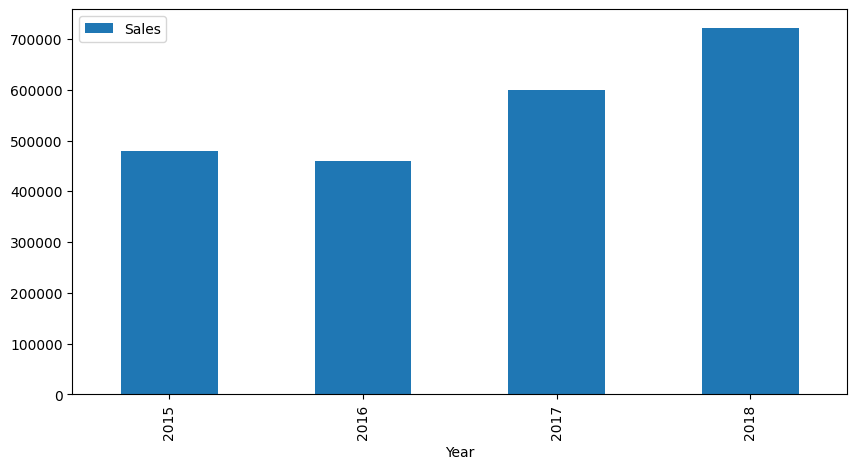

In [22]:
# 연도 별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=90, figsize=(10,5)) # rot : 글자각도

In [23]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', 
                             columns='Segment', 
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

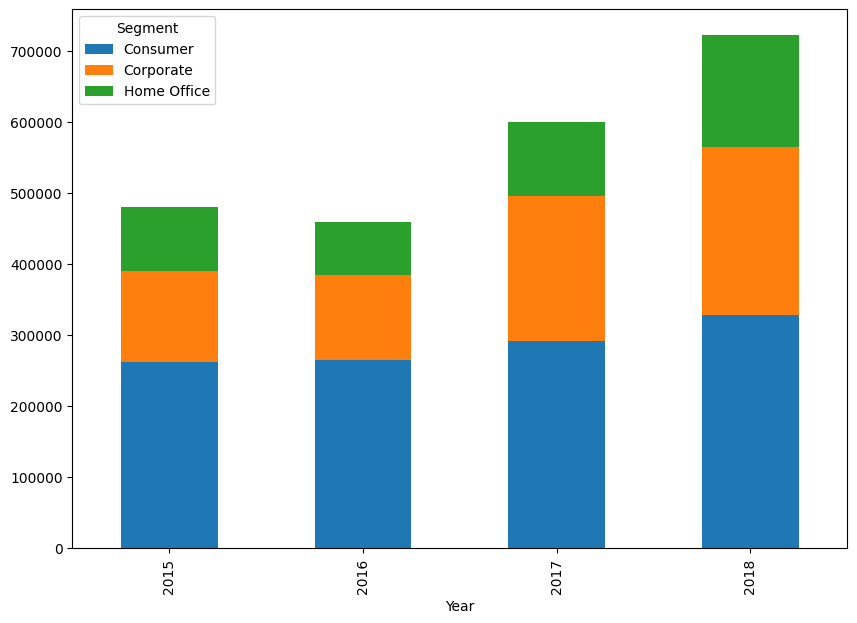

In [25]:
# 연도 별 고객 segment 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))

<Axes: xlabel='Year'>

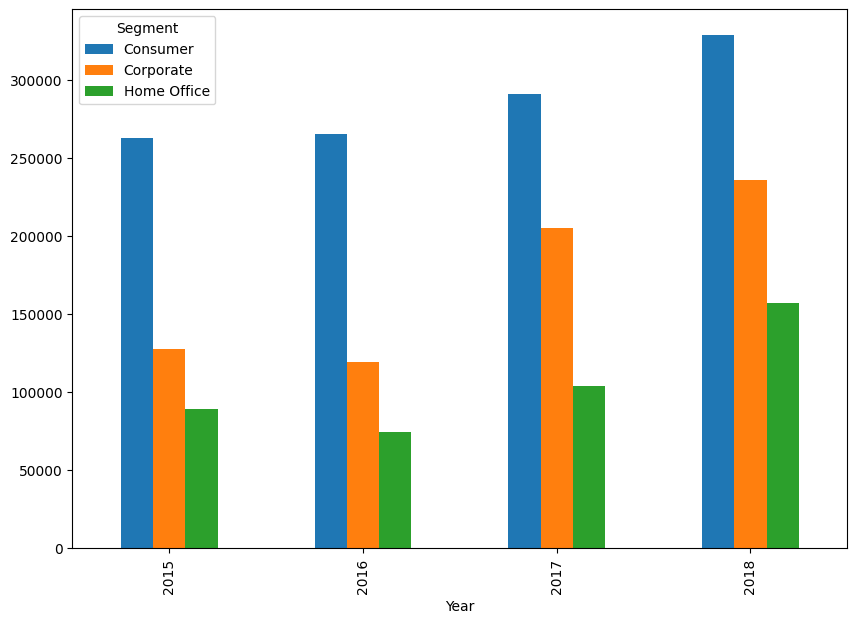

In [27]:
df_bar_2_pv.plot.bar(x='Year', stacked=False, figsize=(10,7)) # stacked 옵션 = False